# Capstone Project - Starbucks Site selection in Toronto
### IBM Data Science Professional Certificate by Coursera

## Contents

1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Analysis](#analysis)
4. [Results and Discussion ](#results)
5. [Conclusions](#conclusions)
6. [Future Directions](#futuredirections)

## 1. Introduction: Business Problem <a name="introduction"></a>

Given the recent announcement in early 2021 of **Starbucks** closing down up to 300 coffee shops across Canada in response to a change in customer behaviour and preferences, the company is closing stores in downtown core areas and will be focusing on expanding to more pick-up and convenience-led store formats. **The stakeholders of Starbucks corp. are looking for optimal sites to open their next stores to reduce cost and obtain high benefits.**

**Toronto** is the capital city of the Canadian province of Ontario and the most populous city in Canada. Unlike most of the grid-plan suburbs found in the outskirts of most North American cities, many suburban neighborhoods in Toronto encouraged high-density populations by mixing single-detached housing with higher-density apartment blocks. This kind of **diverse cityscape provides ample opportunites to open the new-format Starbucks.**

Socioeconomic factors such as population, regional income level, consumer demographics (age) and competitors are important influencers in a good site selection strategy. The **objective** of this study is to generate a few most promising neighborhoods in Toronto based on these factors. This study is **targeted** to the global market planning department of Starbucks and Starbucks' local representatives of Toronto, who are looking for the new sites. We will use various Data Science techniques including Clustering to explore the neighborhoods, cluster them based on the above factors, compare to the existing Starbucks locations, and select the optimal neighborhood cluster(s) to open the new-format Starbucks. 

## 2. Data <a name="data"></a>

### 2.1. Data Sources

Based on our business problem, the factors that will influence our decision are:
   * population
   * income
   * age groups
   * number of competitors (coffee shops)

Following data sources will be needed to extract/generate the required information:

a) https://open.toronto.ca/dataset/neighbourhood-profiles/: The population demographics information (population and income of each neighborhoods) will be obtained from this link of **Open Data Portal - City of Toronto**.

b) https://open.toronto.ca/dataset/wellbeing-toronto-demographics/ : Population grouped by age groups in each neighborhood will be generated from this link of **Open Data Portal - City of Toronto**.

c) https://opencagedata.com : The **OpenCage Geocoding API** will provide the geographical coordinates of the neighborhoods.

d) https://developer.foursquare.com/ : Number of coffee shops, their locations and that of Starbucks will be extracted using the explore function of the **Foursquare API**. 


### 2.2. Data Cleaning

### Creating Neighborhoods profile dataframe

#### Load population demographics data

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner

In [2]:
%cd "E:\Studies\Coursera\IBM Data Science Prof. Cert\Lab\Course 10 Applied Data Science Capstone project\Capstone Project"

E:\Studies\Coursera\IBM Data Science Prof. Cert\Lab\Course 10 Applied Data Science Capstone project\Capstone Project


In [3]:
#load the neighborhood profile dataset and create a dataframe
df_pop = pd.read_csv('neighbourhood_profiles.csv')
df_pop.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

In [4]:
#drop columns that is not needed
df_pop.drop(df_pop.columns[[0,1,2,3]], axis=1, inplace=True)
df_pop.set_index('Characteristic', inplace=True)

#slice to get a dataframe. we are interested in population and after-tax income
df_pop_sliced = df_pop.loc[["Population, 2016",
    "Total - After-tax income groups in 2015 for the population aged 15 years and over in private households - 100% data"]]
df_pop_sliced.drop(['City of Toronto'], axis=1, inplace=True)

#transpose the dataframe and rename the columns
df_neigh = df_pop_sliced.T
df_neigh.columns = ['Population', 'Income']
df_neigh.index.name = 'Neighborhood'

print(df_neigh.shape)
df_neigh.head()

(140, 2)


,Population,Income
Neighborhood,,
Agincourt North,"29,113","24,995"
Agincourt South-Malvern West,"23,757","20,395"
Alderwood,"12,054","10,265"
Annex,"30,526","26,305"
Banbury-Don Mills,"27,695","23,390"


#### Load age group data

In [5]:
#load age group data
df_age = pd.read_excel('age_population.xlsx')

# drop Neighbourhood ID and rename the Neighbourhood column
df_age.drop(['NeighbourhoodID'], axis=1, inplace=True)
df_age.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
df_age.set_index(['Neighborhood'])

print(df_age.shape)
df_age.head()

(141, 26)


,Neighborhood,0 to 04 years,0 to 14 years,05 to 09 years,10 to 14 years,100 years and over,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,55 to 59 years,55 years and over,60 to 64 years,65 to 69 years,65 years and over,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,85 years and over,90 to 94 years,95 to 99 years,Total Population - All Age Groups - 100% data
0,West Humber-Clairville,1540.0,5060.0,1720.0,1790.0,5.0,2325.0,3120.0,2785.0,2345.0,2035.0,1980.0,2475.0,2195.0,8970.0,1795.0,1595.0,4980.0,1185.0,885.0,700.0,400.0,615.0,160.0,50.0,33320.0
1,Mount Olive-Silverstone-Jamestown,2190.0,7090.0,2500.0,2415.0,0.0,2585.0,2655.0,2400.0,2250.0,2185.0,2275.0,2190.0,1955.0,7040.0,1520.0,1285.0,3560.0,885.0,630.0,465.0,225.0,300.0,70.0,10.0,32950.0
2,Thistletown-Beaumond Heights,540.0,1730.0,600.0,595.0,5.0,650.0,760.0,680.0,715.0,665.0,610.0,770.0,660.0,3065.0,535.0,490.0,1880.0,375.0,335.0,320.0,225.0,350.0,100.0,20.0,10360.0
3,Rexdale-Kipling,560.0,1640.0,515.0,565.0,0.0,635.0,720.0,715.0,680.0,640.0,680.0,815.0,870.0,3255.0,650.0,520.0,1730.0,350.0,295.0,270.0,205.0,300.0,85.0,15.0,10530.0
4,Elms-Old Rexdale,540.0,1805.0,605.0,660.0,0.0,690.0,750.0,600.0,575.0,550.0,540.0,755.0,730.0,2535.0,525.0,415.0,1275.0,305.0,235.0,180.0,105.0,145.0,40.0,5.0,9460.0


#### Merge the two dataframes

In [6]:
df_census = pd.merge(df_neigh, df_age, on = 'Neighborhood', how = 'inner')

# 45 to 49 years age group is missing. Calculate from the data and add to the dataframe
df_census['sum'] = df_census[['10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                              '30 to 34 years', '35 to 39 years', '40 to 44 years', '55 years and over']].sum(axis=1)

df_census['45 to 49 years'] = df_census['Total Population - All Age Groups - 100% data'] - df_census['sum']

# replace blank with nan and then fill with median of the column
df_census = df_census.replace('', np.nan)
df_census['45 to 49 years'].fillna(df_census['45 to 49 years'].median(), inplace=True)

# drop some columns
df_census.drop(['sum', 'Total Population - All Age Groups - 100% data', '0 to 04 years','05 to 09 years', 
                '100 years and over', '55 years and over', '65 years and over', 
                '85 years and over', '95 to 99 years'], axis=1, inplace=True)

#add a new column "State" contaning the value Ontario to dataframe 
df_census["State"] = 'Ontario'

# change population and income to float
df_census['Population'] = df_census['Population'].str.replace(',', '').astype(float)
df_census['Income'] = df_census['Income'].str.replace(',', '').astype(float)

print(df_census.shape)
df_census.head()

(139, 22)


,Neighborhood,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,45 to 49 years,State
0,Agincourt North,29113.0,24995.0,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,1665.0,2440.0,2230.0,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0,6960.0,Ontario
1,Agincourt South-Malvern West,23757.0,20395.0,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,1360.0,1950.0,1755.0,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0,5720.0,Ontario
2,Alderwood,12054.0,10265.0,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,860.0,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0,3175.0,Ontario
3,Annex,30526.0,26305.0,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,1750.0,1865.0,1780.0,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0,5260.0,Ontario
4,Banbury-Don Mills,27695.0,23390.0,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,1790.0,2225.0,1935.0,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0,6715.0,Ontario


In [7]:
np.where(pd.isnull(df_census))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
# cap and floor the values at 99% and 1% percentile, respectively, to avoid outliers
df_cap = df_census.loc[:, 'Population':'45 to 49 years']

for col in df_cap.columns:
    percentiles = df_cap[col].quantile([0.01, 0.99]).values
    df_cap[col] = np.clip(df_cap[col], percentiles[0], percentiles[1])

# merge back to the census data
df_census = df_census.combine_first(df_cap)

# reorder Neighbourhood, Income, Population columns to the first column
cols_to_order = ['Neighborhood', 'Population', 'Income']
new_columns = cols_to_order + (df_census.columns.drop(cols_to_order).tolist())
df_census = df_census[new_columns]

print(df_census.shape)
df_census.head()

(139, 22)


,Neighborhood,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,State
0,Agincourt North,29113.0,24995.0,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,1665.0,6960.0,2440.0,2230.0,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0,Ontario
1,Agincourt South-Malvern West,23757.0,20395.0,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,1360.0,5720.0,1950.0,1755.0,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0,Ontario
2,Alderwood,12054.0,10265.0,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,860.0,3175.0,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0,Ontario
3,Annex,30526.0,26305.0,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,1750.0,5260.0,1865.0,1780.0,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0,Ontario
4,Banbury-Don Mills,27695.0,23390.0,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,1790.0,6715.0,2225.0,1935.0,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0,Ontario


#### Get geographical coordinates using OpenCage API

In [9]:
#install and import OpenCageGeocode module
!pip install opencage

from opencage.geocoder import OpenCageGeocode

print("Libraries loaded!")

Libraries loaded!


As the simplest, not-most-efficient approach, I am going to iterate over each row to get the city and state, then use the API to get the corresponding coordinates. I’ll save longitudes and latitudes in two separate lists. Then I can add these two lists as new columns once I’m done.

In [10]:
key = 'b87f2c9f6e4c426caf738d3b6c23a9c4' #API key from https://opencagedata.com

geocoder = OpenCageGeocode(key)

list_lat = [] # create empty lists
list_long = []

for index, row in df_census.iterrows(): #iterate over rows in dataframe
    
    Neighborhood = row['Neighborhood']
    State = row['State']
    query = str(Neighborhood)+','+str(State)
    
    results = geocoder.geocode(query)
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    
    list_lat.append(lat)
    list_long.append(long)

# Create new columns from lists
df_census['Latitude'] = list_lat
df_census['Longitude'] = list_long

In [11]:
print(df_census.shape)
df_census.head() #check the last columns!

(139, 24)


,Neighborhood,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,State,Latitude,Longitude
0,Agincourt North,29113.0,24995.0,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,1665.0,6960.0,2440.0,2230.0,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0,Ontario,43.808038,-79.266439
1,Agincourt South-Malvern West,23757.0,20395.0,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,1360.0,5720.0,1950.0,1755.0,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0,Ontario,43.788555,-79.265661
2,Alderwood,12054.0,10265.0,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,860.0,3175.0,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0,Ontario,43.601717,-79.545232
3,Annex,30526.0,26305.0,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,1750.0,5260.0,1865.0,1780.0,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0,Ontario,43.670338,-79.407117
4,Banbury-Don Mills,27695.0,23390.0,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,1790.0,6715.0,2225.0,1935.0,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0,Ontario,43.752339,-79.365716


Now we have our Neighborhoods Profile Dataframe. The dataframe contains the list of neighborhoods in Toronto along with their population, income, population per age group, and geo coordinates. 

Let's visualize the data.

In [12]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.



In [13]:
#Use OpenCageGeocode library to get the latitude and longitude values of Toronto

query_toronto = 'Toronto, Ontario'

location_toronto = geocoder.geocode(query_toronto)

latitude_toronto = location_toronto[0]['geometry']['lat']
longitude_toronto = location_toronto[0]['geometry']['lng']

print('The geographical coordinates of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geographical coordinates of Toronto are 43.6534817, -79.3839347.


In [14]:
#Create a map of Toronto with neighborhoods superimposed on top
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

#add markers to map
for lat, lng, neighborhood in zip(df_census['Latitude'], df_census['Longitude'], 
                                         df_census['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

### Foursquare API - extracting venues

Let's explore each neighborhood using Foursquare API to get info on Starbucks and coffee shops. Coffee shops are the direct competitors so they are included.

In [15]:
#Define Foursquare credentials and Version
CLIENT_ID = 'CAFGEUTLP40HWRS2HYMCJC5XSAEHY4N04UB3PQL2WXP4UC2I' #your Foursquare ID
CLIENT_SECRET = 'HYFQMVIQZMJ0HH35PGQY3VMYRO3DQ2LKZAWCWPV42HJHI1RM' #your Foursquare Secret
VERSION = '20190425' #Foursquare API version
LIMIT = 100 #A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET' + CLIENT_SECRET)

Your credentials:
CLIENT_ID:CAFGEUTLP40HWRS2HYMCJC5XSAEHY4N04UB3PQL2WXP4UC2I
CLIENT_SECRETHYFQMVIQZMJ0HH35PGQY3VMYRO3DQ2LKZAWCWPV42HJHI1RM


In [16]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Create a function to get nearby venues to the neighborhoods in Toronto
def getNearbyVenues(neighborhood, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for neighborhood, lat, lng in zip(neighborhood, latitudes, longitudes):
            
        #create the API request URL
        url_foursquare = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results_foursquare = requests.get(url_foursquare).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            neighborhood,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_foursquare])

    #convert the list into a new dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood_Latitude', 
                             'Neighborhood_Longitude', 
                             'Venue', 
                             'Venue_Latitude', 
                             'Venue_Longitude', 
                             'Venue_Category']
    
    return(nearby_venues)

In [17]:
#Now apply the above function on each neighborhood and create a new dataframe
df_nearbyvenues = getNearbyVenues(neighborhood=df_census['Neighborhood'],
                                   latitudes=df_census['Latitude'],
                                   longitudes=df_census['Longitude']
                                  )

print(df_nearbyvenues.shape)
df_nearbyvenues.head()

(2652, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Agincourt North,43.808038,-79.266439,Saravanaa Bhavan South Indian Restaurant,43.810117,-79.269275,Indian Restaurant
1,Agincourt North,43.808038,-79.266439,Menchie's,43.808338,-79.268288,Frozen Yogurt Shop
2,Agincourt North,43.808038,-79.266439,Booster Juice,43.809915,-79.269382,Juice Bar
3,Agincourt North,43.808038,-79.266439,Dollarama,43.808894,-79.269854,Discount Store
4,Agincourt North,43.808038,-79.266439,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant


#### Starbucks Data

Filter to get neighborhoods with atleast one Coffee Shop

In [18]:
df_coffee_shops = df_nearbyvenues.query('Venue_Category == "Coffee Shop"')

print(df_coffee_shops.shape)
df_coffee_shops.head()

(172, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
11,Agincourt North,43.808038,-79.266439,Tim Hortons,43.809993,-79.269032,Coffee Shop
52,Alderwood,43.601717,-79.545232,Tim Hortons,43.602396,-79.545048,Coffee Shop
86,Annex,43.670338,-79.407117,Tim Hortons,43.666719,-79.404263,Coffee Shop
87,Annex,43.670338,-79.407117,Second Cup (Miles Nadal JCC Fitness),43.666527,-79.403872,Coffee Shop
91,Annex,43.670338,-79.407117,First And Last Coffee Shop,43.674320,-79.409450,Coffee Shop


In [19]:
# Group the neighborhood by the number of coffee shops
df_coffee_sliced = df_coffee_shops.groupby(['Neighborhood']).size().reset_index()
df_coffee_sliced.columns= ['Neighborhood', 'Coffee Shop']
df_coffee_sliced.set_index('Neighborhood')

print(df_coffee_sliced.shape)
df_coffee_sliced.head()  

(73, 2)


,Neighborhood,Coffee Shop
0,Agincourt North,1
1,Alderwood,1
2,Annex,3
3,Bathurst Manor,3
4,Bay Street Corridor,1


Filter to get neighborhoods with atleast one Starbucks.

In [20]:
df_starbucks = df_nearbyvenues.query('Venue == "Starbucks"')

print(df_starbucks.shape)
df_starbucks.head()

(40, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
217,Bedford Park-Nortown,43.731516,-79.420191,Starbucks,43.728673,-79.418513,Coffee Shop
219,Bedford Park-Nortown,43.731516,-79.420191,Starbucks,43.732604,-79.419136,Coffee Shop
266,Blake-Jones,43.676170,-79.337378,Starbucks,43.679850,-79.340370,Coffee Shop
386,Church-Yonge Corridor,43.670786,-79.385687,Starbucks,43.670340,-79.388262,Coffee Shop
417,Church-Yonge Corridor,43.670786,-79.385687,Starbucks,43.671082,-79.380756,Coffee Shop


Merge the starbucks dataframe with the census dataframe to get the final dataframe consisting of details of the neighborhoods having Starbucks.

In [21]:
df_starbucks_final = pd.merge(df_census, df_starbucks, on = 'Neighborhood', how = 'inner')

print(df_starbucks_final.shape)
df_starbucks_final.head()

(40, 30)


,Neighborhood,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,State,Latitude,Longitude,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Bedford Park-Nortown,23236.0,18560.0,4555.0,1705.0,1725.0,1485.0,875.0,1095.0,1370.0,1495.0,6425.0,1835.0,1665.0,1410.0,1225.0,900.0,660.0,540.0,410.0,200.0,Ontario,43.731516,-79.420191,43.731516,-79.420191,Starbucks,43.728673,-79.418513,Coffee Shop
1,Bedford Park-Nortown,23236.0,18560.0,4555.0,1705.0,1725.0,1485.0,875.0,1095.0,1370.0,1495.0,6425.0,1835.0,1665.0,1410.0,1225.0,900.0,660.0,540.0,410.0,200.0,Ontario,43.731516,-79.420191,43.731516,-79.420191,Starbucks,43.732604,-79.419136,Coffee Shop
2,Blake-Jones,7727.0,6280.0,1405.0,395.0,450.0,435.0,495.0,615.0,670.0,635.0,2200.0,605.0,565.0,375.0,325.0,200.0,155.0,100.0,80.0,20.0,Ontario,43.676170,-79.337378,43.676170,-79.337378,Starbucks,43.679850,-79.340370,Coffee Shop
3,Church-Yonge Corridor,31340.0,29095.0,1260.0,270.0,1040.0,4020.0,5540.0,4485.0,2750.0,1980.0,5005.0,2135.0,1800.0,1435.0,1120.0,750.0,530.0,365.0,180.0,65.0,Ontario,43.670786,-79.385687,43.670786,-79.385687,Starbucks,43.670340,-79.388262,Coffee Shop
4,Church-Yonge Corridor,31340.0,29095.0,1260.0,270.0,1040.0,4020.0,5540.0,4485.0,2750.0,1980.0,5005.0,2135.0,1800.0,1435.0,1120.0,750.0,530.0,365.0,180.0,65.0,Ontario,43.670786,-79.385687,43.670786,-79.385687,Starbucks,43.671082,-79.380756,Coffee Shop


Visualize Starbucks and coffee shop locations on a map.

In [22]:
# create map
map_starbucks = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# add markers to the map

for lat, lon, poi, ven in zip(df_coffee_shops['Venue_Latitude'], df_coffee_shops['Venue_Longitude'], df_coffee_shops['Neighborhood'], df_coffee_shops['Venue']):
    label = folium.Popup('{}, Venue: {}'.format(poi, ven), parse_html=True)    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=1).add_to(map_starbucks)

for lat, lon, poi, pop, inc in zip(df_starbucks_final['Venue_Latitude'], df_starbucks_final['Venue_Longitude'], df_starbucks_final['Neighborhood'], df_starbucks_final['Population'], df_starbucks_final['Income']):
    label = folium.Popup('Starbucks - {}, Pop: {}, Inc: {}'.format(poi, pop, inc), parse_html=True)    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='starbucks green',
        fill=True,
        fill_color='#00704A',
        fill_opacity=1).add_to(map_starbucks)
       
map_starbucks

As we mentioned previously in Introduction: Business Problem section, Starbucks (green circle in the map) is mainly concentrated in the core Downtown of Toronto. The visualization concurs with our problem and is good for our analysis to move outwards for new location.

## 3. Analysis <a name="analysis"></a> 

### Clustering analysis

#### Create a target dataframe for clustering

In [26]:
# merge df_census with df_coffee_grouped
df_final = pd.merge(df_coffee_sliced, df_census, on='Neighborhood', how='right')
df_final.replace(np.nan, 0) #convert nan blanks to 0
df_final['Coffee Shop'] = df_final['Coffee Shop'].replace(np.nan, 0) #convert nan blanks to 0

# create the dataframe for clustering based on the location features
df_clus_analysis = df_final.loc[:, 'Coffee Shop':'90 to 94 years']
print(df_clus_analysis.shape)
df_clus_analysis.head()


(139, 21)


,Coffee Shop,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years
0,1.0,29113.0,24995.0,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,1665.0,6960.0,2440.0,2230.0,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0
1,0.0,23757.0,20395.0,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,1360.0,5720.0,1950.0,1755.0,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0
2,1.0,12054.0,10265.0,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,860.0,3175.0,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0
3,3.0,30526.0,26305.0,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,1750.0,5260.0,1865.0,1780.0,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0
4,0.0,27695.0,23390.0,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,1790.0,6715.0,2225.0,1935.0,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0


We can see here that there is no target label/feature that act as an output and the learning algorithm is left on its own to find the structure in its input. This is Unsupervised Learning and to determine the internal grouping in a set of this unlabeled data, clustering analysis is to be done.

#### Normalize over the standard deviation

In [27]:
from sklearn.preprocessing import StandardScaler
X = df_clus_analysis.values
Clus_dataset = StandardScaler().fit_transform(X)

df_clus_normalized = pd.DataFrame(Clus_dataset)
df_clus_normalized.columns = ['Coffee Shop', 'Population', 'Income', '0 to 14 years', '10 to 14 years','15 to 19 years', '20 to 24 years',
                              '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years','45 to 49 years', '50 to 54 years',
                              '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years',
                              '80 to 84 years', '85 to 89 years', '90 to 94 years']

print(df_clus_normalized.shape)
df_clus_normalized.head()

(139, 21)


,Coffee Shop,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years
0,-0.126041,0.953363,0.980551,0.640774,0.628792,1.097286,0.622901,0.213090,0.120640,0.067552,0.541056,0.955628,1.424649,1.329024,1.687089,1.953022,1.796200,1.762612,1.734995,1.512535,1.358085
1,-0.656939,0.418191,0.453258,0.147566,0.052660,0.708071,0.509673,0.213090,0.026290,-0.077261,0.079014,0.413687,0.719366,0.624808,0.767276,0.755495,0.592508,0.727842,0.648760,0.395413,0.155038
2,-0.126041,-0.751174,-0.707932,-0.700237,-0.806816,-0.782542,-0.751273,-0.581513,-0.557959,-0.581210,-0.678432,-0.698602,-0.597642,-0.450047,-0.574900,-0.677442,-0.727202,-0.697088,-0.477706,-0.582069,-0.420333
3,0.935755,1.094550,1.130715,-0.313407,-0.438469,-0.045517,1.379468,1.631807,1.223817,0.791616,0.669822,0.212645,0.597021,0.661872,1.123938,1.584552,1.926721,1.643868,1.272339,1.540463,2.090375
4,-0.656939,0.811676,0.796572,0.489266,0.713795,0.542447,-0.035879,-0.164423,-0.009999,0.252912,0.730417,0.848551,1.115188,0.891669,0.973765,1.471964,1.999232,2.339369,2.620075,3.690924,3.973406


#### Find the optimal number of clusters, k

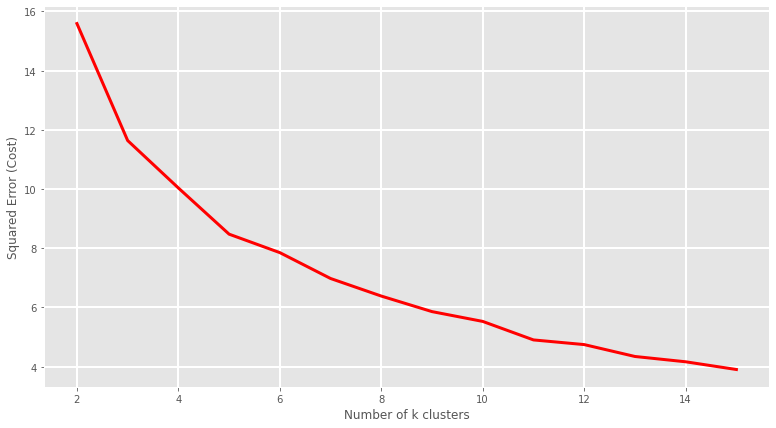

In [28]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(2, 16):
    KM = KMeans(n_clusters=i, max_iter=100)
    try:
        KM.fit(df_clus_normalized)

    except ValueError:
        print('Error on line', i)

    error_cost.append(KM.inertia_ / 100) # calculate squared error for the clustered points

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(2,16), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show() 

To determine the optimal K for K-means, the most common method is the "Elbow Curve" method. The intuition behind the Elbow curve is that the explained variation changes rapidly until the number of groups you have in the data and then it slows down leading to an elbow formation in the graph as shown above. The Elbow point is the number of clusters you should use for your K-Means algorithm. 

However, we can see that the elbow forms at both cluster 3 as well as on 5. To clarify this we use libraries that outputs as a metric to determine the optimal K more clearly.

In [29]:
# Import ElbowVisualizer
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#### Elbow Curve method

KElbowVisualizer generates a nice graph and by default, it uses Distortion Score as a metric that computes the sum of squared distances from each point to its assigned center.

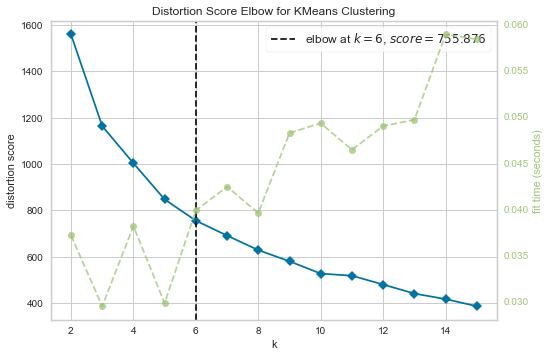

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,16), timings= True)
visualizer.fit(df_clus_normalized)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

We observe an interesting result, the optimal K vlaue suggested is 6 whereas, the graph does not visibly form an elbow at k=6. We can use other metrics in this case - one such is **Silhouette Curve**. 

#### Silhouette Curve method

The silhouette coefficient calculates the density of the cluster by generating a score for each sample based on the difference between the average intra-cluster distance and the mean nearest-cluster distance for that sample normalized by the maximum value. We can find the optimal value of K by generating plots for different values of K and selecting the one with the best score depending on the cluster’s assignment.

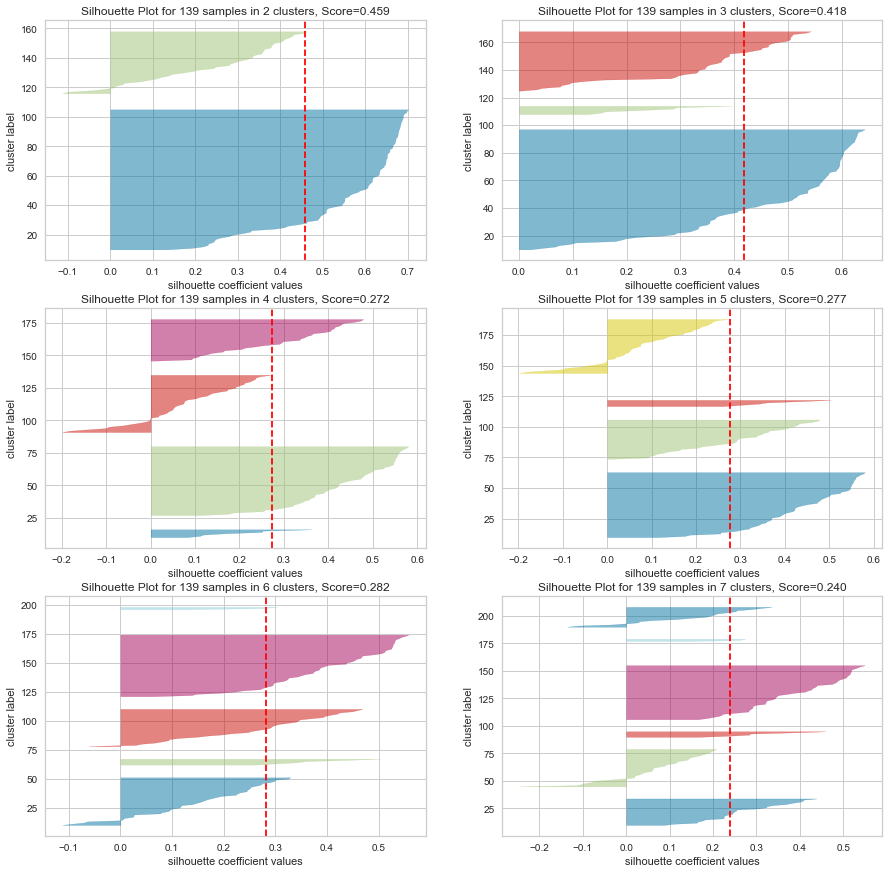

In [31]:
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes_flat = axes.flatten()                     # Flatted the axes to iterate
i=0
for k in range(2,8,1):
    model = KMeans(k)
    # Select the current axis
    ax=axes_flat[i]   
    # Creating SilhouetteVisualizer and assigning it to an axis
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes_flat[i])
    visualizer.fit(df_clus_normalized)
    # Setting subplot title via axis
    ax.set_title(f'Silhouette Plot for 139 samples in {k} clusters, Score={visualizer.silhouette_score_:.3f}')
    # Setting subplot x and y labels
    ax.set(xlabel='silhouette coefficient values', ylabel='cluster label')
    # Going to the next axis (subplot)
    i=i+1

plt.show()

#### Observations from above Silhouette Plots

* The silhouette plot for k=3 clusters is a bad pcik, as one of the cluster in it is below the average silhoutte scores even though it has the highest score among all the k clusters.


* The silhouette plots for k=5 and k=6 clusters are the most promising due to higher silhouette scores.


* The silhouette plot for k=6 has all the cluster labels above its average silhouette score, however, it is a bad pick as the distribution of the clusters are uneven compared to that of k=5.


* Therefore, **k=5** is the most optimal number of clusters for this study.

#### Clustering the Toronto Neighborhood based on location factors Using K-means with k=5

In [32]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=33).fit(df_clus_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 2, 2, 3, 3, 3, 3, 2])

In [33]:
# Create a new dataframe that includes the cluster

df_clus_normalized = df_clus_normalized.loc[:,['Coffee Shop']]

df_final.drop(['Coffee Shop'], axis=1, inplace=True) #drop coffee shop column from df_final
df_clusters = pd.merge(df_final, df_clus_normalized, left_index=True, right_index=True)
df_clusters.insert(0, 'Cluster Label', kmeans.labels_)

# reorder coffee shop column
cols_to_order = ['Cluster Label', 'Neighborhood', 'Population', 'Income', 'Coffee Shop']
new_columns = cols_to_order + (df_clusters.columns.drop(cols_to_order).tolist())
df_clusters = df_clusters[new_columns]

print(df_clusters.shape)
df_clusters.head()

(139, 26)


,Cluster Label,Neighborhood,Population,Income,Coffee Shop,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,State,Latitude,Longitude
0,2,Agincourt North,29113.0,24995.0,-0.126041,3840.0,1240.0,1705.0,2000.0,2020.0,1775.0,1465.0,1665.0,6960.0,2440.0,2230.0,2000.0,1905.0,1290.0,1065.0,865.0,565.0,270.0,Ontario,43.808038,-79.266439
1,2,Agincourt South-Malvern West,23757.0,20395.0,-0.656939,3075.0,935.0,1470.0,1890.0,2020.0,1645.0,1340.0,1360.0,5720.0,1950.0,1755.0,1510.0,1320.0,875.0,760.0,595.0,365.0,155.0,Ontario,43.788555,-79.265661
2,0,Alderwood,12054.0,10265.0,-0.126041,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,860.0,3175.0,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0,Ontario,43.601717,-79.545232
3,2,Annex,30526.0,26305.0,0.935755,2360.0,675.0,1015.0,2735.0,4350.0,3295.0,2090.0,1750.0,5260.0,1865.0,1780.0,1700.0,1725.0,1335.0,1030.0,750.0,570.0,340.0,Ontario,43.670338,-79.407117
4,2,Banbury-Don Mills,27695.0,23390.0,-0.656939,3605.0,1285.0,1370.0,1360.0,1400.0,1595.0,1625.0,1790.0,6715.0,2225.0,1935.0,1620.0,1670.0,1360.0,1235.0,1085.0,955.0,520.0,Ontario,43.752339,-79.365716


#### Visualize the clusters on a map

In [34]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, pop, inc in zip(df_clusters['Latitude'], df_clusters['Longitude'], df_clusters['Neighborhood'], df_clusters['Cluster Label'], df_clusters['Population'], df_clusters['Income']):
    label = folium.Popup('Cluster - {}: {}, Pop:{}, Inc:{}'.format(cluster, poi, pop, inc), parse_html=True)    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Cluster 0

In [35]:
# Cluster 0
df_cluster_0 = df_clusters.loc[df_clusters['Cluster Label'] == 0]

# find median of each column and make it as a dataframe

med_clus0 = pd.DataFrame(df_cluster_0.median().tolist(), columns = ['Cluster 0'])
med_clus0 = med_clus0.T # transpose
med_clus0.columns = ['Cluster Label','Population', 'Income', 'Coffee Shop','0 to 14 years', 
                                        '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                                        '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
                                        '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', 
                                        '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', 
                                        '90 to 94 years', 'Latitude', 'Longitude']

med_clus0



,Cluster Label,Population,Income,Coffee Shop,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,Latitude,Longitude
Cluster 0,0.0,11481.0,9707.5,-0.656939,1685.0,565.0,590.0,720.0,807.5,835.0,795.0,780.0,2690.0,882.5,795.0,680.0,547.5,385.0,312.5,227.5,155.0,70.0,43.687519,-79.42726


#### Cluster 1

In [36]:
# Cluster 1
df_cluster_1 = df_clusters.loc[df_clusters['Cluster Label'] == 1]

# find median of each column and make it as a dataframe

med_clus1 = pd.DataFrame(df_cluster_1.median().tolist(), columns = ['Cluster 1'])
med_clus1 = med_clus1.T # transpose
med_clus1.columns = ['Cluster Label','Population', 'Income', 'Coffee Shop','0 to 14 years', 
                                        '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                                        '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
                                        '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', 
                                        '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', 
                                        '90 to 94 years', 'Latitude', 'Longitude']

med_clus1

,Cluster Label,Population,Income,Coffee Shop,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,Latitude,Longitude
Cluster 1,1.0,45244.5,37765.0,0.139408,7015.0,2412.5,2925.0,3442.5,3597.5,3355.0,3130.0,2895.0,11270.0,3557.5,3052.5,2655.0,2237.5,1607.5,1185.0,930.0,647.5,267.5,43.780256,-79.265629


#### Cluster 2

In [37]:
# Cluster 2
df_cluster_2 = df_clusters.loc[df_clusters['Cluster Label'] == 2]

# find median of each column and make it as a dataframe

med_clus2 = pd.DataFrame(df_cluster_2.median().tolist(), columns = ['Cluster 2'])
med_clus2 = med_clus2.T # transpose
med_clus2.columns = ['Cluster Label','Population', 'Income', 'Coffee Shop','0 to 14 years', 
                                        '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                                        '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
                                        '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', 
                                        '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', 
                                        '90 to 94 years', 'Latitude', 'Longitude']

med_clus2

,Cluster Label,Population,Income,Coffee Shop,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,Latitude,Longitude
Cluster 2,2.0,27392.0,22760.0,-0.656939,4045.0,1260.0,1480.0,1845.0,1865.0,1790.0,1750.0,1750.0,6685.0,2095.0,1875.0,1600.0,1350.0,975.0,850.0,680.0,440.0,225.0,43.746857,-79.383297


#### Cluster 3

In [38]:
# Cluster 3
df_cluster_3 = df_clusters.loc[df_clusters['Cluster Label'] == 3]

# find median of each column and make it as a dataframe

med_clus3 = pd.DataFrame(df_cluster_3.median().tolist(), columns = ['Cluster 3'])
med_clus3 = med_clus3.T # transpose
med_clus3.columns = ['Cluster Label','Population', 'Income', 'Coffee Shop','0 to 14 years', 
                                        '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                                        '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
                                        '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', 
                                        '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', 
                                        '90 to 94 years', 'Latitude', 'Longitude']

med_clus3

,Cluster Label,Population,Income,Coffee Shop,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,Latitude,Longitude
Cluster 3,3.0,17510.0,14610.0,-0.126041,2635.0,845.0,980.0,1220.0,1250.0,1295.0,1260.0,1165.0,4415.0,1335.0,1230.0,1020.0,860.0,595.0,490.0,375.0,240.0,115.0,43.700161,-79.406489


#### Cluster 4

In [39]:
# Cluster 4
df_cluster_4 = df_clusters.loc[df_clusters['Cluster Label'] == 4]

# find median of each column and make it as a dataframe

med_clus4 = pd.DataFrame(df_cluster_4.median().tolist(), columns = ['Cluster 4'])
med_clus4 = med_clus4.T # transpose
med_clus4.columns = ['Cluster Label','Population', 'Income', 'Coffee Shop','0 to 14 years', 
                                        '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                                        '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
                                        '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years', 
                                        '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', 
                                        '90 to 94 years', 'Latitude', 'Longitude']

med_clus4

,Cluster Label,Population,Income,Coffee Shop,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,Latitude,Longitude
Cluster 4,4.0,65913.0,61985.0,0.404857,3650.0,605.0,1140.0,6700.0,15755.0,12400.0,6815.0,4135.0,9070.0,2800.0,2560.0,2120.0,1760.0,1225.0,740.0,530.0,250.0,90.0,43.897022,-78.859198


#### Starbucks

In [41]:
# make dataframe out of median
med_starbucks = pd.DataFrame(df_starbucks_final.median().tolist(), columns = ['Starbucks'])
med_starbucks = med_starbucks.T # transpose
med_starbucks.columns = ['Population', 'Income', '0 to 14 years',
                                '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                                '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
                                '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years',
                                '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years',
                                '90 to 94 years', 'Latitude', 'Longitude', 'Neighborhood Latitude', 
                                'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude']

med_starbucks

,Population,Income,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
Starbucks,15179.0,12270.0,1980.0,590.0,877.5,995.0,1240.0,1205.0,1035.0,1115.0,4155.0,1145.0,1015.0,892.5,780.0,565.0,420.0,342.5,207.5,110.0,43.688078,-79.398327,43.688078,-79.398327,43.687612,-79.398424


## 4. Results and Discussion <a name="results"></a>

### Neighborhood Characteristics

#### Population

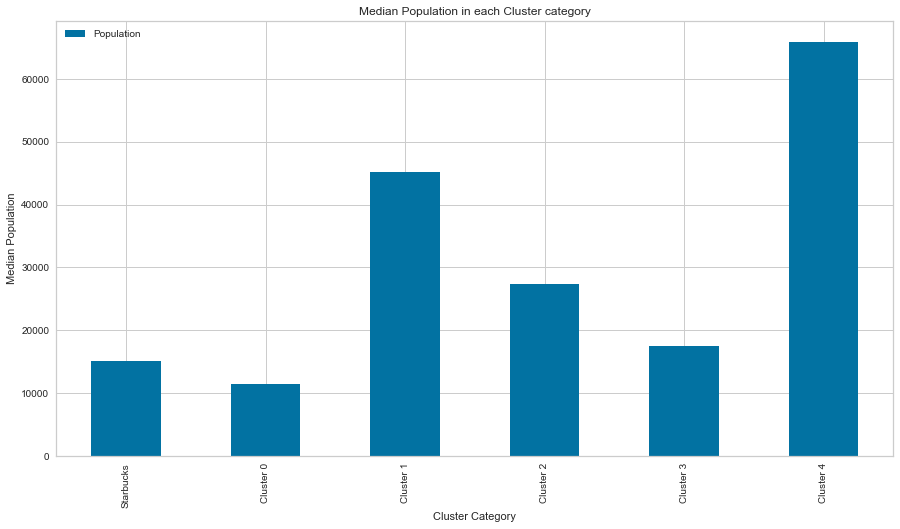

In [42]:
# concat population values of all clusters and starbucks for visualization comparison

df_population = pd.concat([med_starbucks['Population'], med_clus0['Population'], med_clus1['Population'],med_clus2['Population'],
                          med_clus3['Population'], med_clus4['Population']])

df_population = pd.DataFrame(df_population, columns=['Population'])

# Create a bar plot for population
df_population[['Population']].plot(kind='bar', figsize =(15,8))

plt.title('Median Population in each Cluster category')
plt.xlabel('Cluster Category')
plt.ylabel('Median Population')

plt.show()

We see that the median population of neighborhoods with Starbucks currently located is around 15,000. The next closest neighborhoods to that value are Clusters 0, 2, and 3. Although clusters 1 and 4 have the highest median population which would give us more footfalls, we need to consider other factors.

#### Income

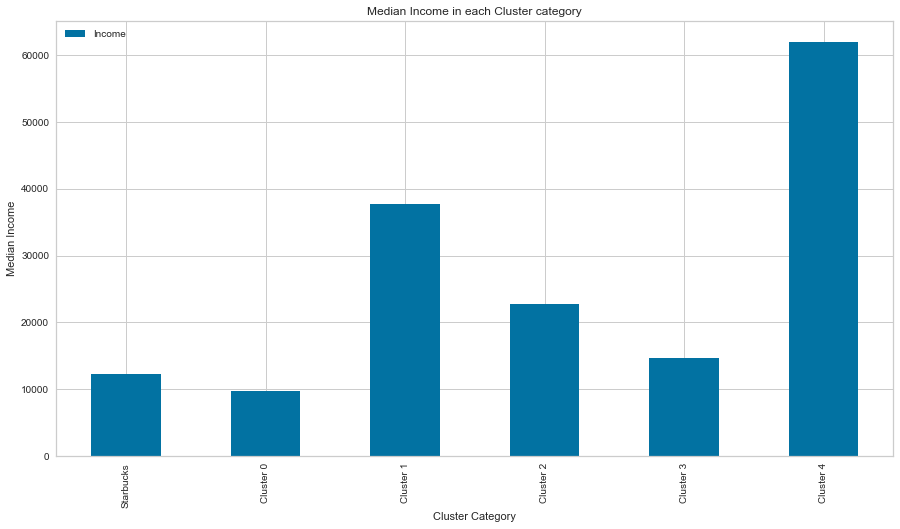

In [43]:
# concat population values of all clusters and starbucks for visualization comparison

df_income = pd.concat([med_starbucks['Income'], med_clus0['Income'], med_clus1['Income'],med_clus2['Income'],
                          med_clus3['Income'], med_clus4['Income']])

df_income = pd.DataFrame(df_income, columns=['Income'])

# Create a bar plot for population
df_income[['Income']].plot(kind='bar', figsize =(15,8))

plt.title('Median Income in each Cluster category')
plt.xlabel('Cluster Category')
plt.ylabel('Median Income (CAD-Canadian Dollars)')

plt.show()

We see that the median income of neighborhoods with Starbucks currently located is around 12,000 CAD. So, we are looking for clusters with low- or mid-income, and clusters 0, 2, and 3 fit well into our criteria.

#### Age groups

In [46]:
# concat Age values of all clusters and starbucks for visualization 

df_age = pd.concat([med_starbucks.loc[:,'0 to 14 years':'90 to 94 years'], med_clus0.loc[:,'0 to 14 years':'90 to 94 years'],
                    med_clus1.loc[:,'0 to 14 years':'90 to 94 years'], med_clus2.loc[:,'0 to 14 years':'90 to 94 years'],
                    med_clus3.loc[:,'0 to 14 years':'90 to 94 years'], med_clus4.loc[:,'0 to 14 years':'90 to 94 years']])

df_age = pd.DataFrame(df_age, columns=['0 to 14 years', 
                                        '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
                                        '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', 
                                        '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years',
                                        '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years', 
                                        '90 to 94 years',])



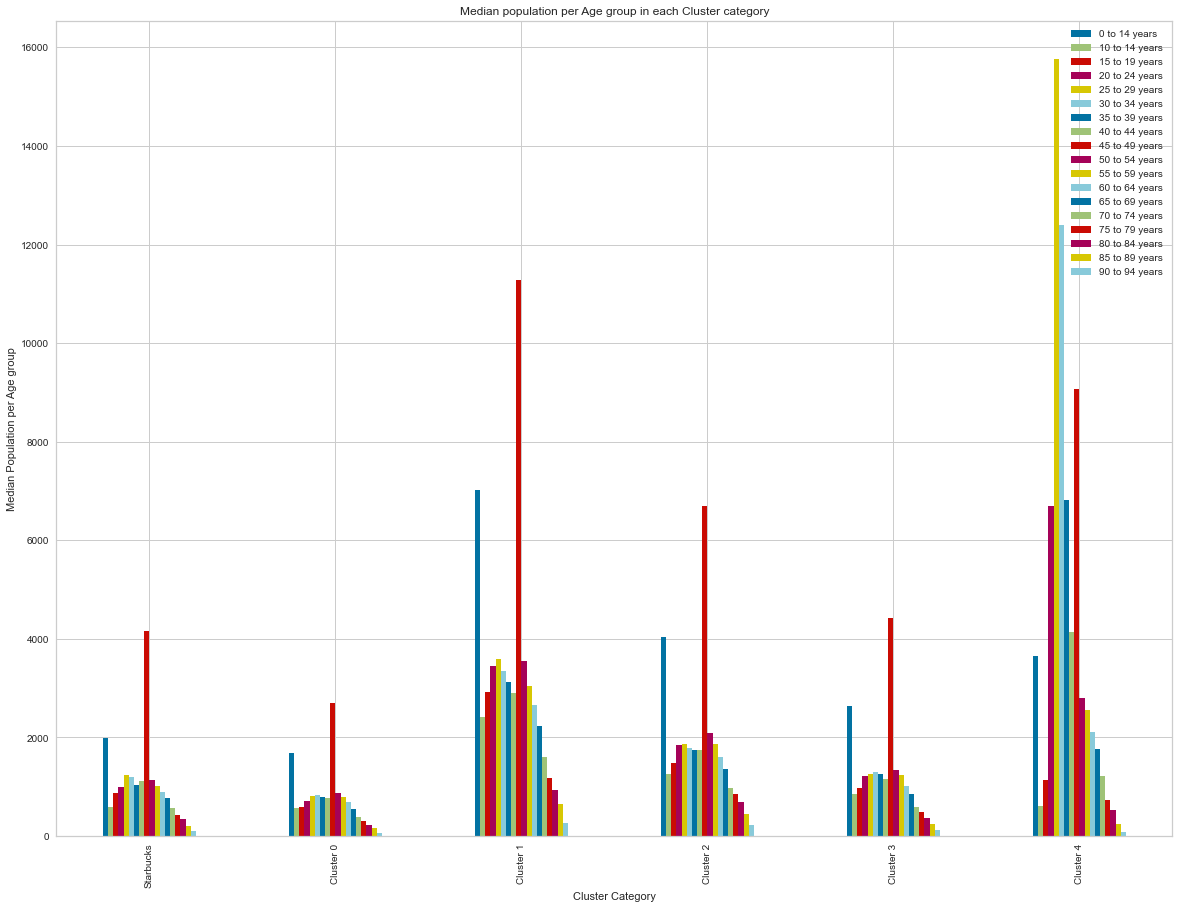

In [59]:
# Create a bar plot for age groups
df_age[['0 to 14 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
        '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', 
        '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years',
        '80 to 84 years', '85 to 89 years', '90 to 94 years']].plot(kind='bar', figsize =(20,15))

plt.title('Median population per Age group in each Cluster category')
plt.xlabel('Cluster Category')
plt.ylabel('Median Population per Age group')

plt.show()

Here, we see that except for cluster 4, all the other clusters show similar age groups "pattern" to that of neighborhoods with Starbucks currently located, and cluster 1 looks the best followed by clusters 2, and 3.

#### Coffee Shops (competitors)

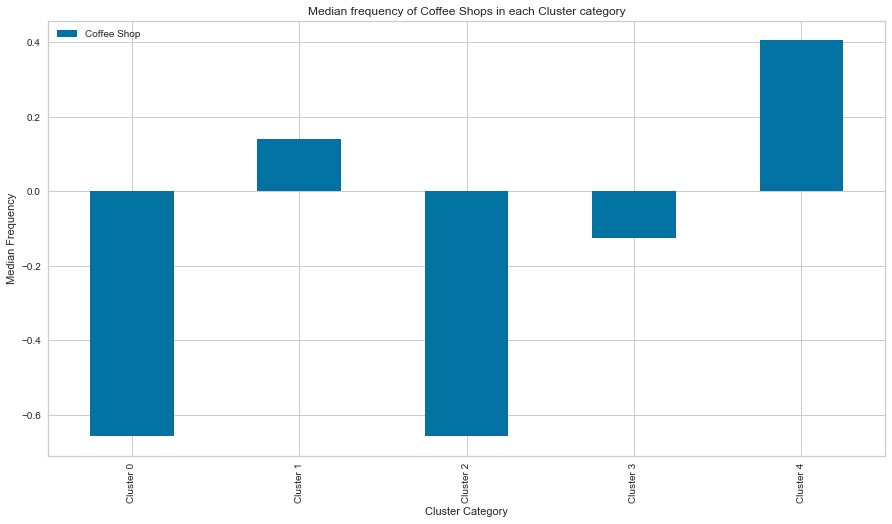

In [48]:
# concat coffeee shop values of all clusters for visualization 

df_coffee_shop = pd.concat([med_clus0['Coffee Shop'], med_clus1['Coffee Shop'],med_clus2['Coffee Shop'],
                          med_clus3['Coffee Shop'], med_clus4['Coffee Shop']])

df_coffee_shop = pd.DataFrame(df_coffee_shop, columns=['Coffee Shop'])

# Testing - create a bar plot for frequency of coffee shops
df_coffee_shop[['Coffee Shop']].plot(kind='bar', figsize =(15,8))

plt.title('Median frequency of Coffee Shops in each Cluster category')
plt.xlabel('Cluster Category')
plt.ylabel('Median Frequency')

plt.show()

Here we clearly see that clusters 0, 2, and 3 have the lowest number of coffee shops. Moreover, these 3 clusters matched well with other factors (population, income, age groups) too, therefore, clusters 0, 2, and 3 are the best sites to open our new format Starbucks.

#### Create a final dataframe of the selected clusters

In [49]:
df_sites = pd.concat([df_cluster_0, df_cluster_2, df_cluster_3]).reset_index()
df_sites


,index,Cluster Label,Neighborhood,Population,Income,Coffee Shop,0 to 14 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 to 89 years,90 to 94 years,State,Latitude,Longitude
0,2,0,Alderwood,12054.0,10265.0,-0.126041,1760.0,480.0,570.0,665.0,715.0,840.0,905.0,860.0,3175.0,1035.0,1030.0,795.0,620.0,420.0,340.0,315.0,190.0,100.0,Ontario,43.601717,-79.545232
1,10,0,Beechborough-Greenbrook,6577.0,5250.0,-0.656939,1120.0,355.0,415.0,440.0,465.0,435.0,465.0,395.0,1760.0,505.0,465.0,420.0,275.0,235.0,160.0,155.0,75.0,75.0,Ontario,43.693261,-79.479240
2,14,0,Blake-Jones,7727.0,6280.0,-0.126041,1405.0,395.0,450.0,435.0,495.0,615.0,670.0,635.0,2200.0,605.0,565.0,375.0,325.0,200.0,155.0,100.0,80.0,20.0,Ontario,43.676170,-79.337378
3,15,0,Briar Hill-Belgravia,14257.0,12360.0,0.404857,1855.0,600.0,745.0,910.0,1085.0,1140.0,1125.0,1025.0,3595.0,1200.0,1085.0,840.0,725.0,420.0,375.0,270.0,205.0,85.0,Ontario,43.699030,-79.452841
4,16,0,Bridle Path-Sunnybrook-York Mills,9266.0,7750.0,-0.126041,1435.0,630.0,750.0,675.0,415.0,285.0,355.0,515.0,2330.0,820.0,800.0,725.0,575.0,430.0,315.0,225.0,165.0,60.0,Ontario,43.730978,-79.378803
5,17,0,Broadview North,11499.0,9880.0,-0.126041,1470.0,440.0,445.0,595.0,900.0,1040.0,970.0,950.0,2880.0,890.0,755.0,680.0,620.0,425.0,310.0,235.0,175.0,70.0,Ontario,43.683922,-79.356942
6,19,0,Cabbagetown-South St. James Town,11669.0,10195.0,1.997551,800.0,220.0,295.0,740.0,1050.0,1005.0,930.0,820.0,2620.0,1130.0,945.0,770.0,790.0,550.0,370.0,260.0,195.0,85.0,Ontario,43.669410,-79.372854
7,20,0,Caledonia-Fairbank,9955.0,8420.0,-0.656939,1490.0,490.0,545.0,675.0,730.0,835.0,750.0,670.0,2590.0,815.0,765.0,585.0,420.0,320.0,240.0,175.0,105.0,45.0,Ontario,43.690620,-79.454340
8,21,0,Casa Loma,10968.0,9580.0,0.404857,1200.0,445.0,445.0,635.0,970.0,900.0,655.0,595.0,2190.0,740.0,700.0,765.0,830.0,665.0,470.0,305.0,255.0,100.0,Ontario,43.678101,-79.409416
9,22,0,Centennial Scarborough,13362.0,11190.0,-0.656939,2150.0,780.0,940.0,910.0,715.0,650.0,755.0,815.0,3465.0,1135.0,1050.0,905.0,840.0,665.0,475.0,240.0,115.0,35.0,Ontario,43.787491,-79.150768


### Selected optimal neighborhood clusters to open the new-format Starbucks.

In [79]:
# create map
map_sites = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color schemes for the clusters

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, pop, inc in zip(df_sites['Latitude'], df_sites['Longitude'], df_sites['Neighborhood'], df_sites['Cluster Label'], df_sites['Population'], df_sites['Income']):
    label = folium.Popup('Cluster - {}: {}, Pop:{}, Inc:{}'.format(cluster, poi, pop, inc), parse_html=True)    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_sites)

# add markers for starbucks current locations
for lat, lon, poi, pop, inc in zip(df_starbucks_final['Venue_Latitude'], df_starbucks_final['Venue_Longitude'], df_starbucks_final['Neighborhood'], df_starbucks_final['Population'], df_starbucks_final['Income']):
    label = folium.Popup('Starbucks - {}, Pop: {}, Inc: {}'.format(poi, pop, inc), parse_html=True)    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='starbucks green',
        fill=True,
        fill_color='#00704A',
        fill_opacity=1).add_to(map_sites)

# add shaded area around the clusters
for lat, lon in zip(df_sites['Latitude'], df_sites['Longitude']):
    folium.Circle(
        [lat,lon], 
        radius = 2000, 
        color='#00000000', 
        fill=True, 
        fill_color='orange', 
        fill_opacity=0.1).add_to(map_sites)
    
# add shaded area around the starbucks locations
for lat, lon in zip(df_starbucks_final['Venue_Latitude'], df_starbucks_final['Venue_Longitude']):
    folium.Circle(
        [lat,lon], 
        radius = 1000, 
        color='#00000000', 
        fill=True, 
        fill_color='#00704A', 
        fill_opacity=0.5).add_to(map_sites)
       
map_sites

The shaded neighborhood clusters that are not in the vicinity of the current Starbucks locations (dark green), are optimal to open up the new format Starbucks store(s). Most of the locations are away from the core Downtown Toronto area which we was our primary interest. 

The selected neighborhood clusters are identified by comparing with the neighborhood characterisitics of current Starbucks locations. The neighborhood characteristics described below represent the Starbucks target population/potential customers:
* **MID** Population - **MID** Young Adults, and **HIGH** Middle-Aged Adults
* **MID** Spending Power (Income)
* **LOW** Number of Competitors

## 5. Conclusions <a name="conclusions"></a>

In this study, we chose potential neighborhood clusters corresponding to their characteristics - target population, spending power, and number of competitors. The most promising neighborhoods belonged to clusters 0, 2, and 3, excluding the current Starbucks locations.

The target customers are the working population comprised mostly middle-aged adults followed by young adults. This makes sense as the current Starbucks are located closely to Office buildings intending for customers to have a cup of coffee before/after work and during breaks. Now, with change in customer behaviours and prefering to work from home mostly, the chosen neighborhoods are well placed withing the residential area or suburbs. This would help the global market planning department of Starbucks and Starbucks' local representatives of Toronto to open up more pick-up and convenience-led store formats.

As these are mostly residential neighborhoods, number of competitors are scarce, space rental would expected to be lower, and the pick-up format Starbucks can be easily placed within the existing hypermarkets, discount department stores, and grocery stores. There are some potential locations on the Ontario Highway 401 which would be perfectly suited for travelers crossing the city or leaving the city for vacations.

In conclusion, the study extensively provides optimal neighborhoods for the stakeholdes of Starbucks Co. to open their new format stores with high likelihood success. Similarly, we can interchangeably use this study to expand the potential Starbucks locations in other cities/towns across Canada.

## 6. Future Directions <a name="futuredirections"></a>

The model has certainly some limitations in capturing the exact target population as the core Downtown Toronto, where most of the Starbucks coffeeshops are located, are usually comprised of commercial areas and office buildings. Therefore, the observed demographic features would not reflect well during census. This could be resolved by adding the Starbucks' customer data for the future studies. The customer data could give us more accurate target population and potential neighborhoods could be narrowed down.

A possible direction of future research in this area could be towards improving the recommendation performance such as precision, recall and F1 score by carefully exploiting different preferences among users, proximity to landmarks/public areas, business areas, real estate availability. Additionally, using these factors and more we could create a hybrid recommendation engine to predict/suggest specific Starbucks store format (traditional, pick-up, express, or store tie-ups) for different neighborhoods. 